In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
file = pd.read_spss("../data/Annual 2005-2011_START.sav")
cleaned_file = file.dropna(axis=1)
new_columns =[]
for i in range(len(cleaned_file.columns)):
    new_columns.append(f'column_{i}')
cleaned_file.columns = new_columns
cleaned_file

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_12,column_13,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21
0,6095.0,0.942380,0.060563,0.678302,-0.161531,0.202055,0.165019,0.399033,0.799019,5.426569,...,1.082798,0.655937,4.454819,3.975687,0.892446,1007.536232,0.076738,0.055049,0.034904,5.0
1,255.0,1.980494,0.274382,0.916775,0.624425,0.089377,0.220648,0.000000,0.933519,14.041958,...,1.123828,0.705951,10.618881,12.295547,1.157895,357.294118,0.116068,0.059740,0.025647,5.0
2,114.0,0.374160,0.001494,0.085138,-1.504990,0.235739,0.508929,0.888889,0.779049,5.017007,...,1.185374,0.123415,0.794785,6.258929,7.875000,36.894737,-0.584879,0.010563,0.000000,5.0
3,365.0,7.859079,0.831978,2.449864,0.875862,0.059439,0.030030,0.011111,0.942010,16.244444,...,1.309449,2.804607,48.363889,26.142643,0.540541,33.676983,0.171731,0.496295,0.312415,5.0
4,168.0,1.779376,0.005596,0.883293,0.527853,0.135491,0.886686,0.489796,0.887341,10.558673,...,0.994832,0.473041,5.628827,3.125354,0.555241,19.103896,0.064809,0.025726,0.011839,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2690,217.0,2.292818,0.157246,1.344241,0.488230,0.242939,0.287504,0.037536,0.757061,4.140520,...,1.515589,1.548526,8.469201,6.301110,0.744003,21.593865,0.144724,0.225957,0.190609,11.0
2691,105.0,1.572188,0.163862,1.032772,0.283944,0.169852,0.193680,0.000000,0.830148,6.752174,...,2.291405,1.451423,11.805435,11.071356,0.937819,20.000000,0.056625,0.084859,0.074050,11.0
2692,121.0,1.453574,0.023380,0.692051,0.312040,0.191408,0.361702,0.368349,0.808592,4.313779,...,2.111519,3.087073,16.469304,19.757774,1.199673,81.020134,0.068547,0.199335,0.108159,11.0
2693,243.0,1.310646,0.014829,0.330798,0.044386,0.251739,0.151533,0.027721,0.748261,4.449443,...,3.010763,1.598242,9.503749,25.150932,2.646422,35.840617,0.042199,0.067100,0.052599,11.0


<Axes: >

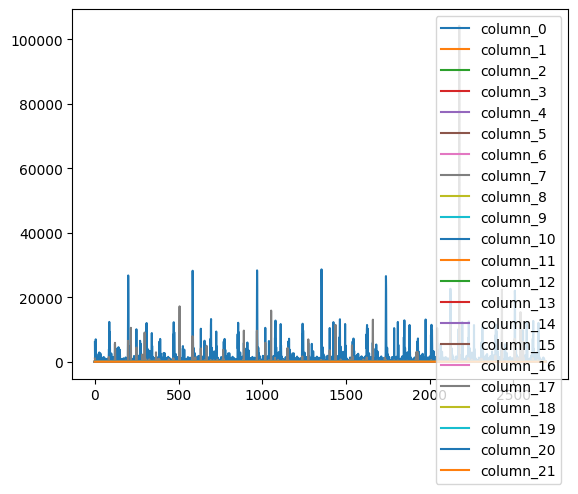

In [9]:
cleaned_file.plot()


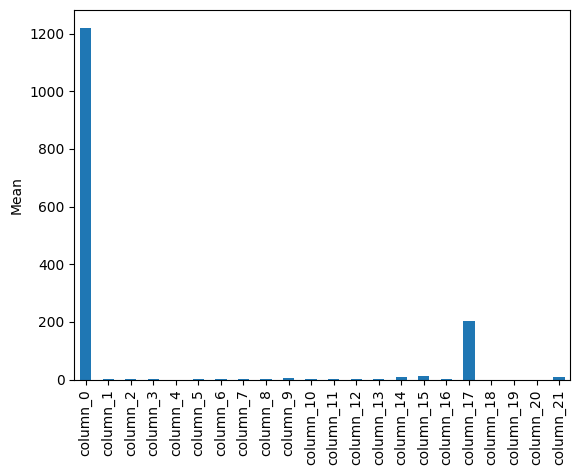

In [15]:
means = cleaned_file.mean()
means.plot(kind='bar')
plt.ylabel('Mean')
plt.show()

Text(0, 0.5, 'Standard Deviation')

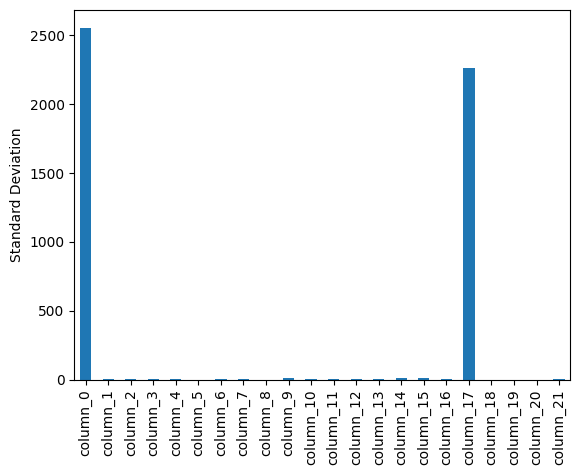

In [18]:
std = cleaned_file.std()
std.plot(kind='bar')
plt.ylabel('Standard Deviation')